***Importing*** the necessary libraries:

**Matplotlib**: library for creating static and interactive visualizations

**SQLite3**: A Python library for interacting with SQLite.

**Seaborn**: A Python visualization library built on Matplotlib, providing a high-level interface for creating attracttive graphics

**Pandas**: A Python library for data manipulation and analysis, offering powerful data structures like DataFrames for handling tabular data.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Reading the csv with **pandas**, checking the data with df.head

*The `df.head()` method in Pandas is used to display the first five rows of a Data*

In [7]:
df=pd.read_csv("/content/Data.csv")
print(df.head())

  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849     11   6.62              0.34     48        20                 2.47   
1  3129     16  11.86              0.36     88        41                 2.67   
2  2940     28  23.21              0.75    120        57                 3.88   
3  2842     13  14.06              0.47    117        42                 3.91   
4  1745     13  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  
0  

***Connecting*** to ***SQL*** using sqlite3, creating the table using the ***`.to_sql`*** function

In [8]:
conn=sqlite3.connect(":memory:")
df.to_sql("Table", conn, index=False, if_exists="replace")

660

Creating the SQL **query** selecting League and Player Names, Summing goals and xG  using `SUM` to then group it by players and leagues. Summing the null values using `CASE` and `WHEN` to see if there's any

Ordering by goals by descending `DESC` and limiting the query to 50 using `LIMIT`.

Then reading it with `read_sql_query`

In [9]:
query="""
SELECT League, [Player Names],
       SUM(Goals) AS Total_Goals,
       SUM(xG) AS XG,
       SUM(CASE WHEN Goals IS NULL THEN 1 ELSE 0 END) AS Goals_Null_Count,
       SUM(CASE WHEN xG IS NULL THEN 1 ELSE 0 END) AS xG_Null_Count
FROM "Table"
WHERE League IN ("Premier League", "La Liga", "France Ligue 1", "Bundesliga", "Serie A")
GROUP BY League,[Player Names]
ORDER BY Goals DESC
LIMIT 50
"""
data=pd.read_sql_query(query, conn)
print(data.head())

           League               Player Names  Total_Goals      XG  \
0         La Liga               Lionel Messi          135  111.77   
1  France Ligue 1       Kylian Mbappe-Lottin           60   55.96   
2      Bundesliga  Pierre-Emerick Aubameyang           44   45.30   
3      Bundesliga         Robert Lewandowski          127  125.11   
4  Premier League                 Harry Kane           71   53.96   

   Goals_Null_Count  xG_Null_Count  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  


As we can see, everything is good and works well

Now we can start creating and preparing the **scatter plot** using **seaborn and matplotlib**

Setting up the theme and the palette using sns.set_theme

*sns.set_theme() in Seaborn sets the visual style for plots, controlling background, grid, fonts, and colors. Defaults to "darkgrid" but can be customized (e.g., style="white", palette="pastel")*.

In [10]:
sns.set_theme(style="whitegrid", palette="deep")

Setting up the figure

In [11]:
plt.figure(figsize=(16,10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

And finally, creating the **scatter plot** ,  **hueing** by League and **sizing** by goals to understand the scatter better, turning on `markers` , setting up the `fontsizes` , `pad`, moving the legend using `loc` , making it smaller using `prop` and `title_fontsize`, tightening the layout using `plt.tight_layout()`.

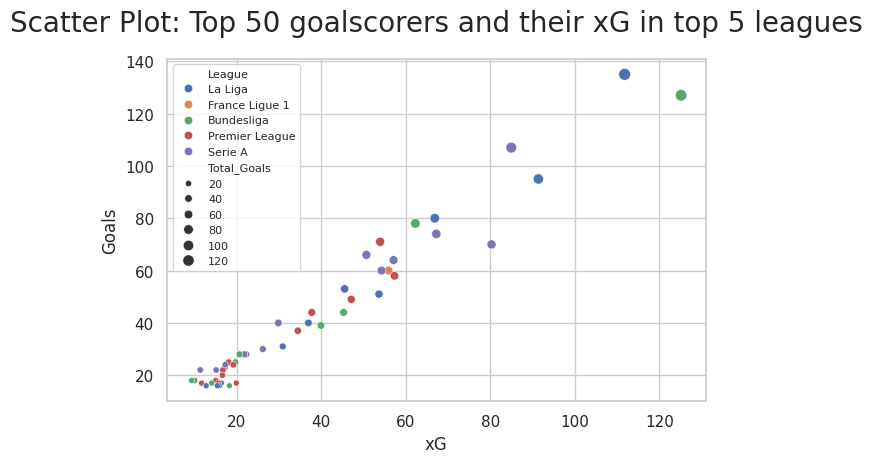

In [13]:
sns.scatterplot(data=data, x="XG", y="Total_Goals", hue="League",size="Total_Goals", markers=True)
plt.xlabel("xG", fontsize=12)
plt.ylabel("Goals", fontsize=12)
plt.title("Scatter Plot: Top 50 goalscorers and their xG in top 5 leagues", fontsize=20, pad=20)
plt.legend(
    loc='upper left',
    prop={'size': 8},
    title_fontsize=9
)
plt.tight_layout()
plt.show()